In [130]:
import numpy as np
from itertools import count
import matplotlib.pyplot as plt

In [191]:
def estimate(n):
    R_i = n
    for i in count(1):
        R_i = np.random.binomial(R_i, 0.5)
        if R_i <= 1:
            return 2**(i-1)

In [195]:
N = 2048
C = 100000
res = []
for _ in range(C):
    res.append(estimate(N))
res = np.array(res)
mu = res.mean()

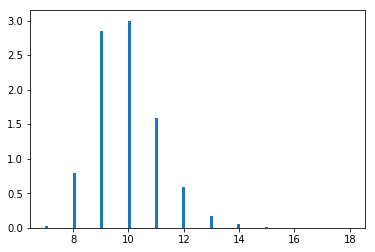

In [196]:
plt.hist(np.log2(res), bins=100, density=True)
plt.show()

In [197]:
print(res.mean())
print(np.log2(res).mean())

1476.96128
9.89366


estimation whether |S| > 2^i

In [161]:
N = 1
C = 10000

res = []
for i in range(1, 20):
    p = np.mean(np.random.binomial(N, 1/2**i, size=C) != 0)
    res.append(p)

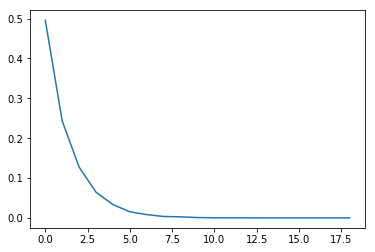

In [162]:
plt.plot(res)
plt.show()

In [90]:
res = []
res2 = []
for i in range(1, 20):
    p = (1 - 1/2**i)**N
    p2 = N/2**i
    res.append(1 - p)
#     res2.append(p2)

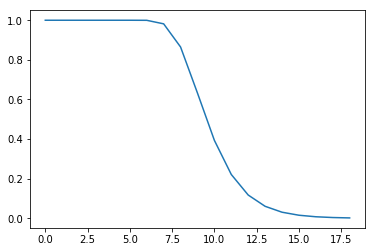

In [91]:
plt.plot(res)
# plt.plot(res2)
plt.show()

Trials to get to 0

In [134]:
def n_trials(N):
    R_i = N
    for i in count(1):
        R_i = np.random.binomial(R_i, 0.5)
        if R_i == 0:
            return i

def avg_trials(N, C):
    return np.array([n_trials(N) for _ in range(C)]).mean()

In [158]:
N = 1000
C = 10000

log_Ns = list(range(0, 5))
Ts = []

for n in log_Ns:
    Ts.append(avg_trials(2**n, C))

In [159]:
i = 2
log_Ns[i], Ts[i]

(2, 3.52)

It seems to take on average log2(N) + 1.33 trials to hear nothing in the amphitheatre.

Maybe this depends on independence. Definitely does.

So shouldn't we estimate log2(N) = t - 1.33?

Well, we will be off by only a factor of 2^1.33 $\approx$ 2.5. And maybe the other direction is bad if we have dependence.

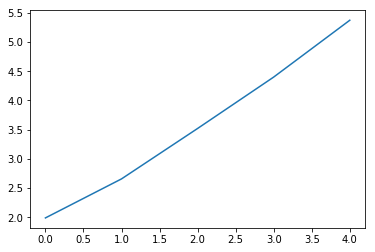

In [160]:
plt.plot(log_Ns[:], np.array(Ts[:]))
# plt.plot(np.array(Ts[1:]) - np.array(log_Ns[1:]))
plt.show()